# Customer Segmentation

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

# 1. Load Data

In [3]:
df = pd.read_excel('dataset/Online Retail.xlsx', sheet_name='Online Retail')

In [4]:
df.shape

(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# 2. Data Clean-Up

#### - Negative Quantity

In [7]:
df.loc[df['Quantity'] <= 0].shape

(10624, 8)

In [8]:
df.shape

(541909, 8)

In [9]:
df = df.loc[df['Quantity'] > 0]

In [10]:
df.shape

(531285, 8)

#### - Missing CustomerID

In [11]:
pd.isnull(df['CustomerID']).sum()

133361

In [12]:
df.shape

(531285, 8)

In [13]:
df = df[pd.notnull(df['CustomerID'])]

In [14]:
df.shape

(397924, 8)

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### - Excluding Incomplete Month

In [16]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 ~ 2011-12-09 12:50:00


In [17]:
df.loc[df['InvoiceDate'] >= '2011-12-01'].shape

(17304, 8)

In [18]:
df.shape

(397924, 8)

In [19]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [20]:
df.shape

(380620, 8)

#### - Total Sales

In [21]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [22]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### - Per Customer Data

In [23]:
customer_df = df.groupby('CustomerID').agg({'Sales': sum, 'InvoiceNo': lambda x: x.nunique()})
customer_df

/tmp/ipykernel_1006437/2855833657.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  customer_df = df.groupby('CustomerID').agg({'Sales': sum, 'InvoiceNo': lambda x: x.nunique()})


,Sales,InvoiceNo
CustomerID,,
12346.0,77183.60,1
12347.0,4085.18,6
12348.0,1797.24,4
12349.0,1757.55,1
12350.0,334.40,1
...,...,...
18280.0,180.60,1
18281.0,80.82,1
18282.0,100.21,1


In [24]:
customer_df.columns = ['TotalSales', 'OrderCount']
customer_df['AvgOrderValue'] = customer_df['TotalSales'] / customer_df['OrderCount']

In [25]:
customer_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000
12352.0,2506.04,8,313.255000
12353.0,89.00,1,89.000000
12354.0,1079.40,1,1079.400000
12355.0,459.40,1,459.400000


In [26]:
customer_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4298.000000
mean,1952.818779,4.131689,400.255621
std,8354.913254,7.420253,1271.187289
min,0.000000,1.000000,0.000000
25%,304.305000,1.000000,178.602500
50%,657.265000,2.000000,295.033958
75%,1599.515000,4.000000,431.594250
max,268478.000000,201.000000,77183.600000


In [27]:
# rank =메서드로 매출 순위로 내림차순
rank_df = customer_df.rank(method='first')

In [28]:
rank_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,4290.0,1.0,4298.0
12347.0,3958.0,3470.0,3888.0
12348.0,3350.0,2861.0,3303.0
12349.0,3321.0,2.0,4238.0
12350.0,1241.0,3.0,2561.0
12352.0,3630.0,3774.0,2360.0
12353.0,119.0,4.0,201.0
12354.0,2781.0,5.0,4151.0
12355.0,1670.0,6.0,3354.0


In [29]:
rank_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4298.000000
mean,2149.500000,2149.500000,2149.500000
std,1240.870058,1240.870058,1240.870058
min,1.000000,1.000000,1.000000
25%,1075.250000,1075.250000,1075.250000
50%,2149.500000,2149.500000,2149.500000
75%,3223.750000,3223.750000,3223.750000
max,4298.000000,4298.000000,4298.000000


In [30]:
# 정규화값  (rank_df - rank_df의 평균값) / rand_df의 표준편차
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()

In [31]:
normalized_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724999,-1.731446,1.731446
12347.0,1.457445,1.064173,1.401033
12348.0,0.967466,0.573388,0.929590
12349.0,0.944096,-1.730641,1.683093
12350.0,-0.732148,-1.729835,0.331622
12352.0,1.193114,1.309162,0.169639
12353.0,-1.636352,-1.729029,-1.570269
12354.0,0.508917,-1.728223,1.612981
12355.0,-0.386422,-1.727417,0.970690


In [32]:
normalized_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4.298000e+03
mean,0.000000,0.000000,-6.612776e-18
std,1.000000,1.000000,1.000000e+00
min,-1.731446,-1.731446,-1.731446e+00
25%,-0.865723,-0.865723,-8.657232e-01
50%,0.000000,0.000000,0.000000e+00
75%,0.865723,0.865723,8.657232e-01
max,1.731446,1.731446,1.731446e+00


# 3. Customer Segmentation via K-Means Clustering

In [33]:
from sklearn.cluster import KMeans

#### - K-Means Clustering

In [34]:
# 정규화된 변수를 선택한다
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])

In [35]:
kmeans

KMeans(n_clusters=4)

In [36]:
kmeans.labels_

array([3, 1, 1, ..., 0, 2, 1], dtype=int32)

In [37]:
kmeans.cluster_centers_

array([[-1.21348286, -0.75405065, -1.05429352],
       [ 1.20249775,  0.95952787,  0.94239226],
       [ 0.33623869,  0.81468809, -0.60672331],
       [-0.16044419, -0.85567505,  0.76388977]])

In [38]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [39]:
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,3
12347.0,1.457445,1.064173,1.401033,1
12348.0,0.967466,0.573388,0.929590,1
12349.0,0.944096,-1.730641,1.683093,3
12350.0,-0.732148,-1.729835,0.331622,3


In [40]:
four_cluster_df.groupby('Cluster').count()['TotalSales']

Cluster
0    1201
1    1092
2     942
3    1063
Name: TotalSales, dtype: int64

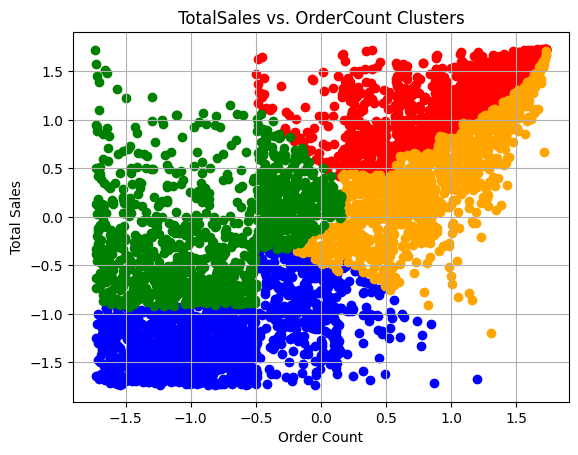

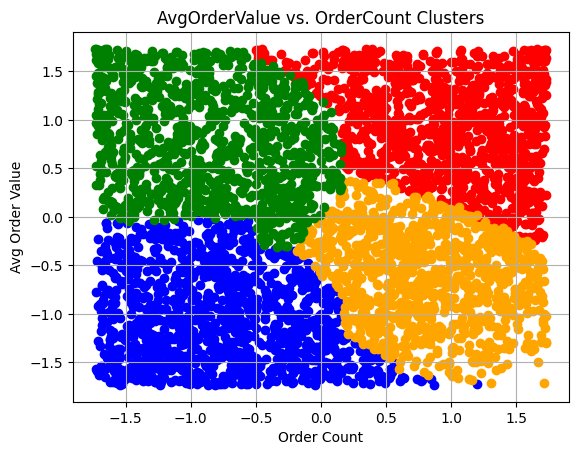

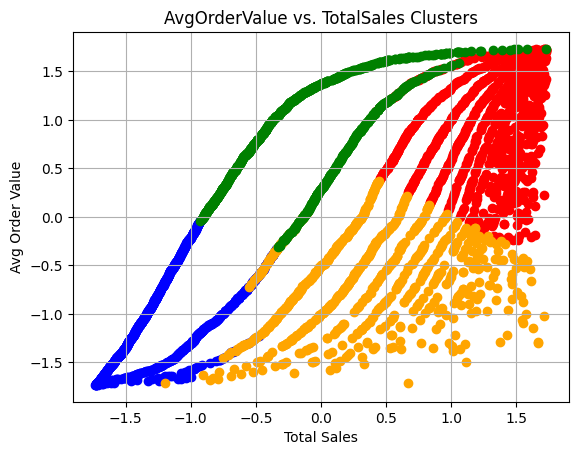

In [41]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green'
)

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

#### - Selecting the best number of clusters

In [42]:
from sklearn.metrics import silhouette_score

In [43]:
for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
    )
    silhouette_avg = silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']], 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 4 Clusters: 0.4117
Silhouette Score for 5 Clusters: 0.3778
Silhouette Score for 6 Clusters: 0.3786
Silhouette Score for 7 Clusters: 0.3804
Silhouette Score for 8 Clusters: 0.3675


#### - Interpreting Customer Segments

In [44]:
kmeans = KMeans(n_clusters=4).fit(
    normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
)

In [45]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [46]:
four_cluster_df.head(15)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,0
12347.0,1.457445,1.064173,1.401033,2
12348.0,0.967466,0.573388,0.929590,2
12349.0,0.944096,-1.730641,1.683093,0
12350.0,-0.732148,-1.729835,0.331622,0
12352.0,1.193114,1.309162,0.169639,2
12353.0,-1.636352,-1.729029,-1.570269,1
12354.0,0.508917,-1.728223,1.612981,0
12355.0,-0.386422,-1.727417,0.970690,0


In [47]:
kmeans.cluster_centers_

array([[-0.13271459, -0.85015948,  0.79867829],
       [-1.24710672, -0.79832009, -1.0614356 ],
       [ 1.2065999 ,  1.00649424,  0.86602985],
       [ 0.21455387,  0.71230485, -0.64275425]])

In [48]:
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 2]
high_value_cluster.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12347.0,1.457445,1.064173,1.401033,2
12348.0,0.967466,0.573388,0.929590,2
12352.0,1.193114,1.309162,0.169639,2
12356.0,1.268868,0.158357,1.557375,2
12359.0,1.585581,0.574194,1.672617,2


In [49]:
customer_df.loc[high_value_cluster.index].describe()

,TotalSales,OrderCount,AvgOrderValue
count,1133.000000,1133.000000,1133.000000
mean,5626.552419,8.512798,616.126497
std,15471.084369,10.514212,766.841056
min,1019.520000,1.000000,215.450606
25%,1770.560000,4.000000,354.356000
50%,2740.430000,6.000000,441.390000
75%,4487.680000,10.000000,619.008000
max,268478.000000,192.000000,14844.766667


In [50]:
pd.DataFrame(df.loc[df['CustomerID'].isin(high_value_cluster.index)
                   ].groupby('Description').count()['StockCode'].sort_values(ascending=False).head())

,StockCode
Description,
JUMBO BAG RED RETROSPOT,1147
REGENCY CAKESTAND 3 TIER,1079
WHITE HANGING HEART T-LIGHT HOLDER,1074
LUNCH BAG RED RETROSPOT,938
PARTY BUNTING,865


In [51]:
pd.DataFrame(df.loc[df['CustomerID'].isin(four_cluster_df.loc[four_cluster_df['Cluster'] 
                                                              == 3].index)].groupby('Description').count()['StockCode'].sort_values(ascending=False).head())

,StockCode
Description,
WHITE HANGING HEART T-LIGHT HOLDER,611
REX CASH+CARRY JUMBO SHOPPER,436
REGENCY CAKESTAND 3 TIER,317
PARTY BUNTING,309
ASSORTED COLOUR BIRD ORNAMENT,307
